In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
#load the iris dataset
iris=load_iris()
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.Series(iris.target)
#randomly split the data into training(80%) and test(20%)sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Training set size:",X_train.shape)
print("Test set size:",X_test.shape)


Training set size: (120, 4)
Test set size: (30, 4)


In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
#set up Stratified Shuffle Split
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
#perform the split
for train_index,test_index in sss.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
print("Training set class distribution:\n",y_train.value_counts())
print("Test set class distribution:\n",y_test.value_counts())

Training set class distribution:
 2    40
0    40
1    40
Name: count, dtype: int64
Test set class distribution:
 0    10
1    10
2    10
Name: count, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
#first,split into training and remaining data(80% training ,20% remaining)
X_train,X_remaining,y_train,y_remaining=train_test_split(X,y,train_size=0.6)
#then,split the remaining data into validation and test sets(each 50% of the remaining 40%)
X_val,X_test,y_val,y_test=train_test_split(X_remaining,y_remaining,train_size=0.5)
#check the sizes of the splits
print(f"Training set size:{X_train.shape[0]} samples")
print(f"Validation set size:{X_val.shape[0]} samples")
print(f"Test set size:{X_test.shape[0]} samples")

Training set size:90 samples
Validation set size:30 samples
Test set size:30 samples


In [4]:
from sklearn.model_selection import StratifiedKFold
#initialize StratifiedKFold with 5 folds
kf=StratifiedKFold(n_splits=5, )
#loop through each fold
for fold,(train_index,test_index) in enumerate(kf.split(X,y),1):
    #create training and test sets
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    #display the fold and the size of each set
    print(f"Fold{fold}:")
    print(f"Training set:{X_train.shape[0]} samples")
    print(f"Test set:{X_test.shape[0]} samples")
    print()

Fold1:
Training set:120 samples
Test set:30 samples

Fold2:
Training set:120 samples
Test set:30 samples

Fold3:
Training set:120 samples
Test set:30 samples

Fold4:
Training set:120 samples
Test set:30 samples

Fold5:
Training set:120 samples
Test set:30 samples



In [5]:
from sklearn.model_selection import LeaveOneOut
#initialize leave-one-out cross validation
loo=LeaveOneOut()
#loop through each fold
for train_index,test_index in loo.split(X):
    #create training and test sets
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    #train the model
    print(f"Training set:{X_train.shape[0]} samples")
    print(f"Test set:{X_test.shape[0]} samples")
    print()

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training set:149 samples
Test set:1 samples

Training s

data transformation


c:\Users\shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

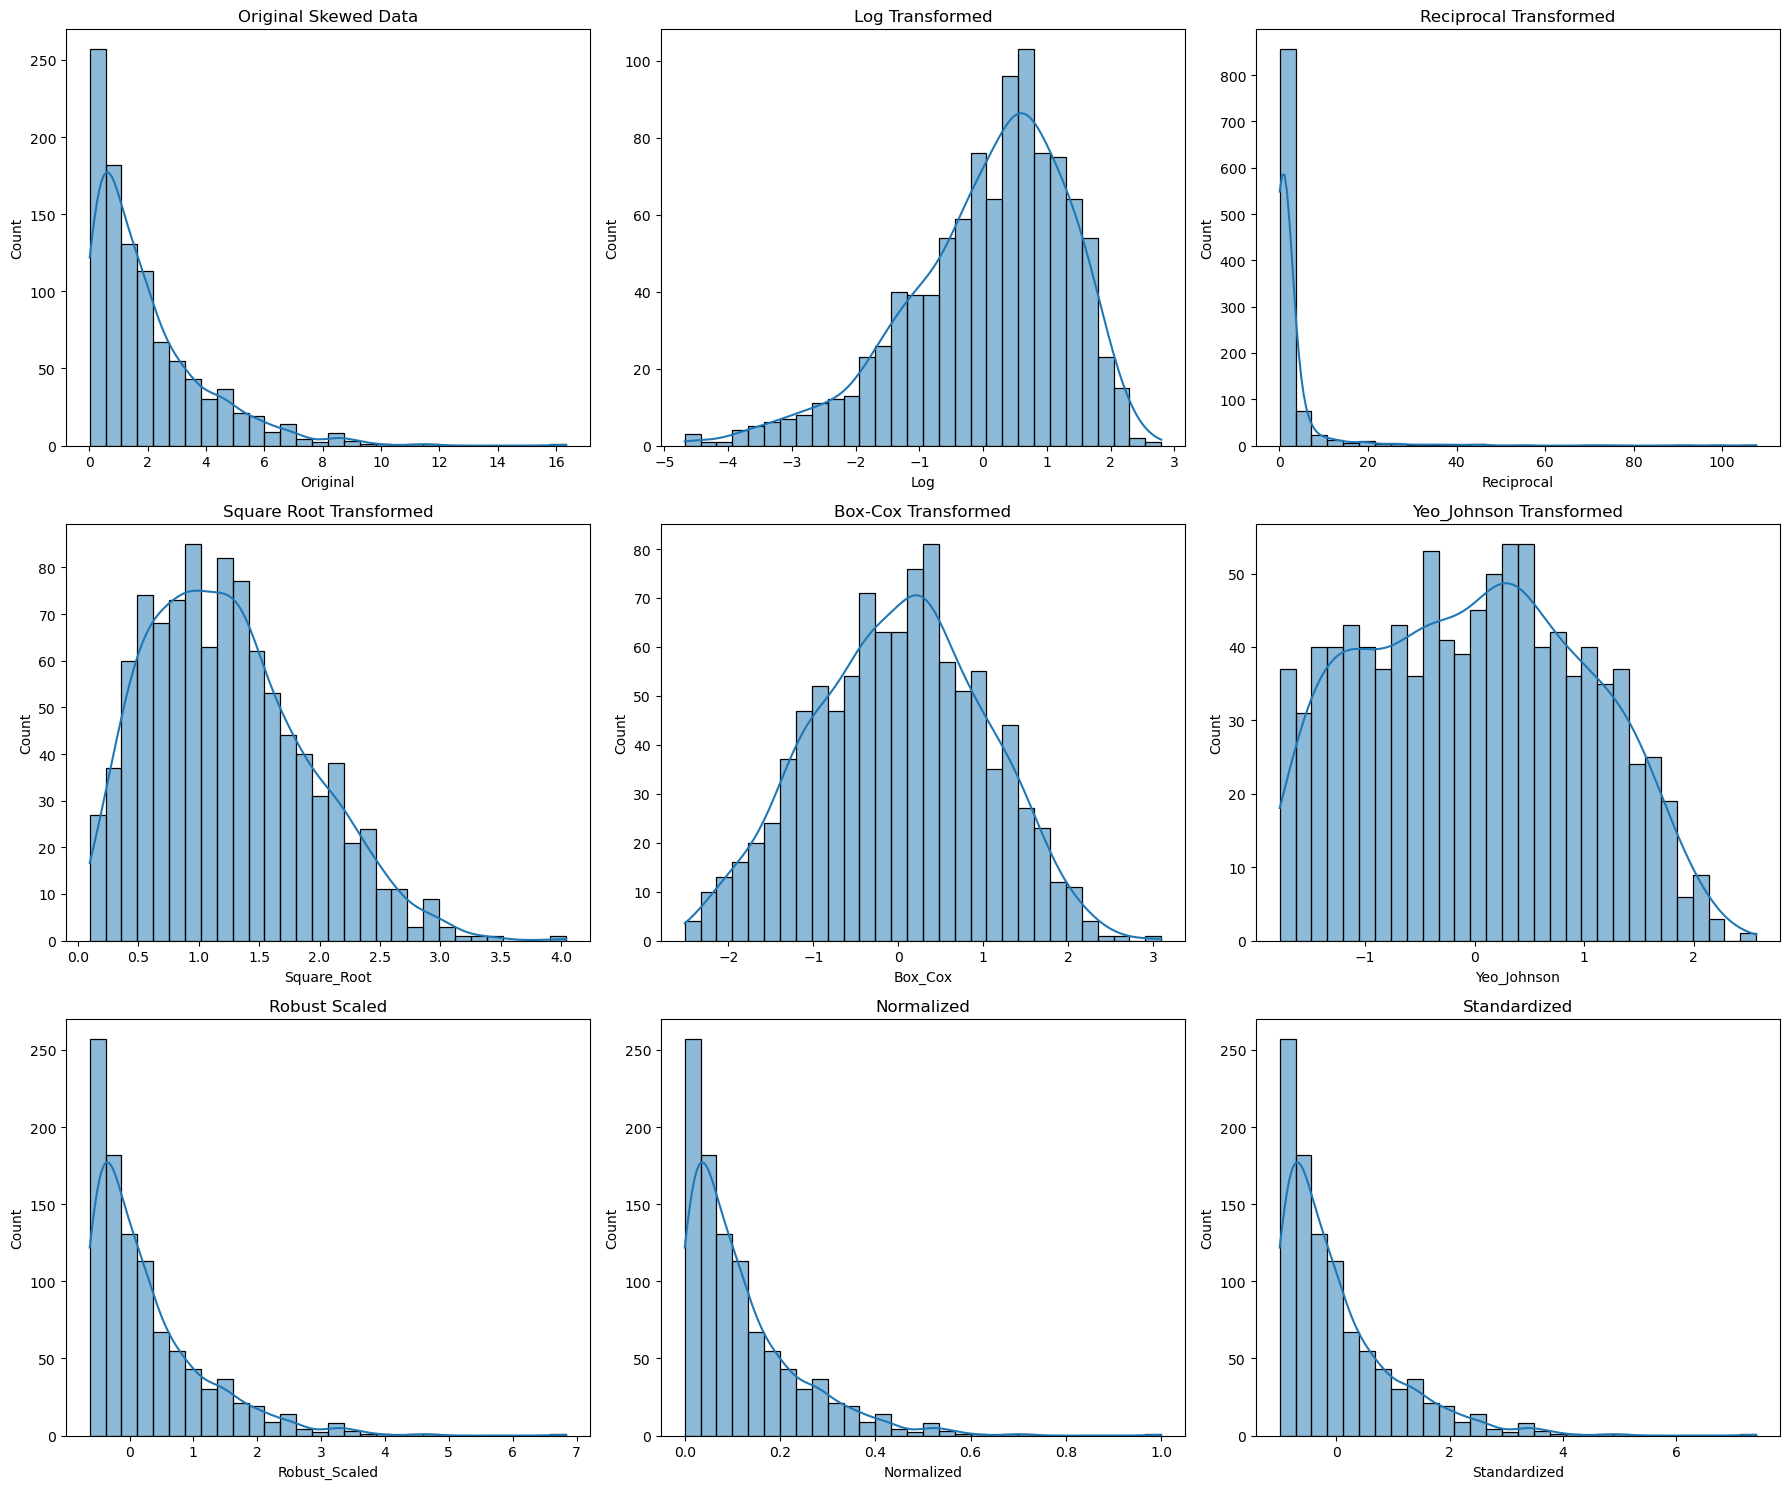

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,RobustScaler,MinMaxScaler,StandardScaler
#generate skewed data(esponential distribution)
np.random.seed(42)
data=np.random.exponential(scale=2,size=1000)
df=pd.DataFrame(data,columns=['Original'])
#apply transformations and scaling
df['Log']=np.log(df['Original'])
df['Reciprocal']=1/(df['Original']+1e-6)
df['Square_Root']=np.sqrt(df['Original'])
#apply power transformations
pt_bc=PowerTransformer(method='box-cox')
df['Box_Cox']=pt_bc.fit_transform(df[['Original']])
pt_yj=PowerTransformer(method='yeo-johnson')
df['Yeo_Johnson']=pt_yj.fit_transform(df[['Original']])
#apply scaling techniques
robust_scaler=RobustScaler()
df['Robust_Scaled']=robust_scaler.fit_transform(df[['Original']])
min_max_scaler=MinMaxScaler()
df['Normalized']=min_max_scaler.fit_transform(df[['Original']])
standard_scaler=StandardScaler()
df['Standardized']=standard_scaler.fit_transform(df[['Original']])
df['Abs_Scaled']=df['Original']/np.abs(df['Original']).max()
#visualize the transformations
fig, axes=plt.subplots(3, 3, figsize=(18,15))
sns.histplot(df['Original'],bins=30,kde=True,ax=axes[0, 0])
axes[0, 0].set_title('Original Skewed Data')
sns.histplot(df['Log'],bins=30,kde=True,ax=axes[0, 1])
axes[0, 1].set_title('Log Transformed')
sns.histplot(df['Reciprocal'],bins=30,kde=True,ax=axes[0, 2])
axes[0, 2].set_title('Reciprocal Transformed')
sns.histplot(df['Square_Root'],bins=30,kde=True,ax=axes[1, 0])
axes[1, 0].set_title('Square Root Transformed')
sns.histplot(df['Box_Cox'],bins=30,kde=True,ax=axes[1, 1])
axes[1, 1].set_title('Box-Cox Transformed')
sns.histplot(df['Yeo_Johnson'],bins=30,kde=True,ax=axes[1, 2])
axes[1, 2].set_title('Yeo_Johnson Transformed')
sns.histplot(df['Robust_Scaled'],bins=30,kde=True,ax=axes[2, 0])
axes[2, 0].set_title('Robust Scaled')
sns.histplot(df['Normalized'],bins=30,kde=True,ax=axes[2, 1])
axes[2, 1].set_title('Normalized')
sns.histplot(df['Standardized'],bins=30,kde=True,ax=axes[2, 2])
axes[2, 2].set_title('Standardized')
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from sklearn.datasets import fetch_california_housing 
data=fetch_california_housing()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target,name='MedHouseVal')
print(x.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [8]:
from sklearn.feature_selection import VarianceThreshold
threshold=0.5
selector=VarianceThreshold(threshold)
x_high_variance=selector.fit_transform(x)
selected_features_var=x.columns[selector.get_support()].tolist()
print("Selected Features using Variance Threshold:",selected_features_var)

Selected Features using Variance Threshold: ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix=pd.concat([x,y],axis=1).corr()
threshold=0.1
selected_features_corr=correlation_matrix['MedHouseVal'][abs(correlation_matrix['MedHouseVal'])thershold].index.drop('MedHouseVal')
print("Selected Features using Correlation Coefficient:",selected_features_corr.tolist())
plt.figure(figsize=(10,8))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3814051336.py, line 5)

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
#load the california housing dataset
data=fetch_california_housing()
X=pd.DataFrame(data.data, columns=data.feature_names)
y=pd.Series(data.target, name='MedHouseVal')
#display the first few rows of the dataset
print(X.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [ ]:
from sklearn.feature_selection import VarianceThreshold
#apply variance threshold
threshold=0.5 #set the threshold for variance
selector=VarianceThreshold(threshold)
x_high_variance=selector.fit_transform(X)
#gete the selected feature names
selected_features_var=X.columns[selector.get_support()].tolist()
print("Selected Features using Variance Threshold:",selected_features_var)

Selected Features using Variance Threshold: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']


Selected Features using Correlation Coefficient: ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']


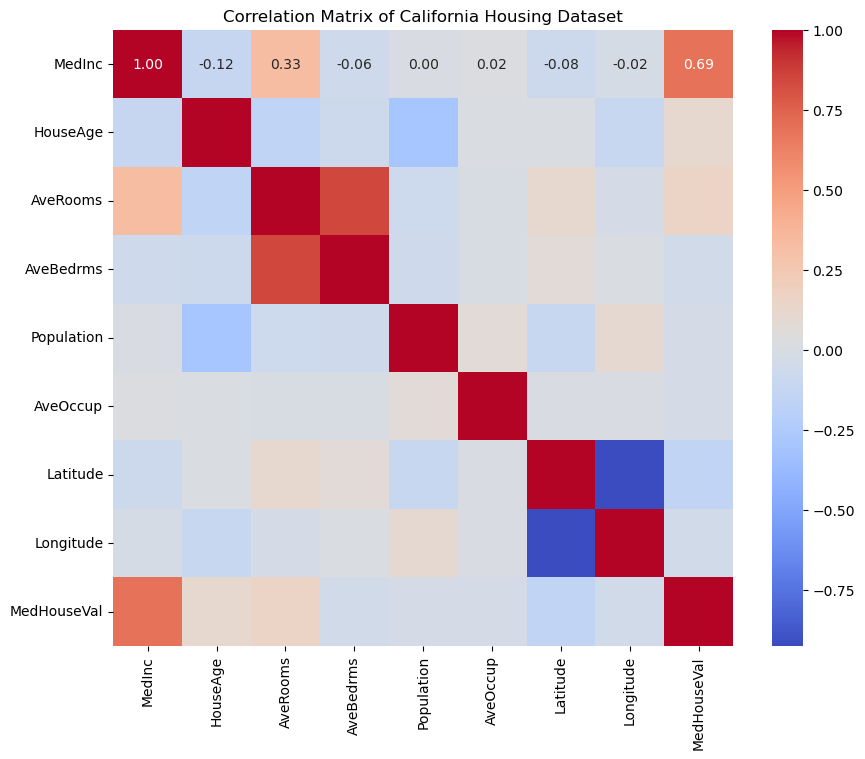

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#calculate the correlation matrix
correlation_matrix=pd.concat([X,y],axis=1).corr()
#select features with a correlation above a certain threshold with the target
threshold=0.1 #set a threshold for correlation
selected_features_corr=correlation_matrix['MedHouseVal'][abs(correlation_matrix['MedHouseVal'])>threshold].index.drop('MedHouseVal')
print("Selected Features using Correlation Coefficient:",selected_features_corr.tolist())
#plot the correlation matrix 
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix of California Housing Dataset')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
#binning 
y_binned=pd.qcut(y,4,labels=False)
#discretize the countries features into categorical using quantiles
X_discretized=X.apply(lambda x: pd.qcut(x,4,labels=False))
#apply the chi_squared test
chi_selector=SelectKBest(chi2,k=4) #select the top 4 features
x_chi2=chi_selector.fit_transform(X_discretized,y_binned)
#get the selected feature names
selected_features_chi2=X_discretized.columns[chi_selector.get_support()].tolist()
print("Selected Features using Chi-Square Test:",selected_features_chi2)

Selected Features using Chi-Square Test: ['MedInc', 'AveRooms', 'AveOccup', 'Latitude']


      Feature  MI Score
7   Longitude  0.400147
0      MedInc  0.387097
6    Latitude  0.370763
2    AveRooms  0.102874
5    AveOccup  0.072716
1    HouseAge  0.033368
3   AveBedrms  0.024149
4  Population  0.020878


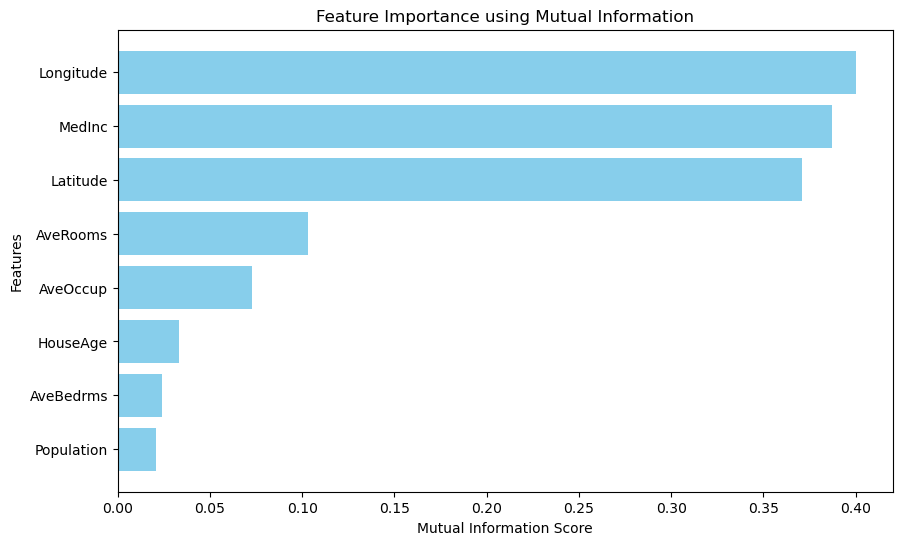

In [ ]:
from sklearn.feature_selection import mutual_info_regression
#calculate mutual information between each feature and the target
mi_scores=mutual_info_regression(X,y,random_state=42)
#create a dataframe to display names and their MI scores
mi_df=pd.DataFrame({'Feature':X.columns,'MI Score': mi_scores})
mi_df=mi_df.sort_values(by='MI Score', ascending=False)
#display the most informative features
print(mi_df)
#plot the MI scores for visualization
plt.figure(figsize=(10,6))
plt.barh(mi_df['Feature'],mi_df['MI Score'],color='skyblue')
plt.xlabel("Mutual Information Score")
plt.ylabel('Features')
plt.title('Feature Importance using Mutual Information')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#load dataset
data=fetch_california_housing()
print(data)
X=pd.DataFrame(data.data, columns=data.feature_names)
y=pd.Series(data.target, name='MedHouseVal')
#train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#forward selection
def forward_selection(X_train,y_train,X_test,y_test):
    features=list(X_train.columns)
    selected_features=[]
    best_score=float('inf')
    while features:
        scores=[]
        for feature in features:
            subset=selected_features+[feature]
            model=LinearRegression()
            model.fit(X_train[subset],y_train)
            y_pred=model.predict(X_test[subset])
            score=mean_squared_error(y_test,y_pred)
            scores.append((score,feature))
        scores.sort() #sort by score
        best_score,best_feature=scores[0]
        if score>best_score:
            selected_features.append(best_feature)
            features.remove(best_feature) #use remove() method
        else:
            break
    return selected_features
selected_features=forward_selection(X_train,y_train,X_test,y_test)
print("Selected Features using Forward Selection:",selected_features)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

Shape of X(features): (150, 4)
Shape of y (target labels): (150,)

First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

First % values of y: [0 0 0 0 0]
Original means: [5.84333333 3.05733333 3.758      1.19933333]
Original standard deviations: [0.82530129 0.43441097 1.75940407 0.75969263]

Means after scaling: [1. 1. 1. 1.]
     Principal Component 1  Principal Component 2  Target
0                -2.264703               0.480027       0
1                -2.080961              -0.674134       0
2                -2.364229              -0.341908       0
3                -2.299384              -0.597395       0
4                -2.389842               0.646835       0
..                     ...                    ...     ...
145               1.870503               0.386966       2
146               1.564580              -0.896687       2
147               1.521170               0.269069       2
148               1.372788   

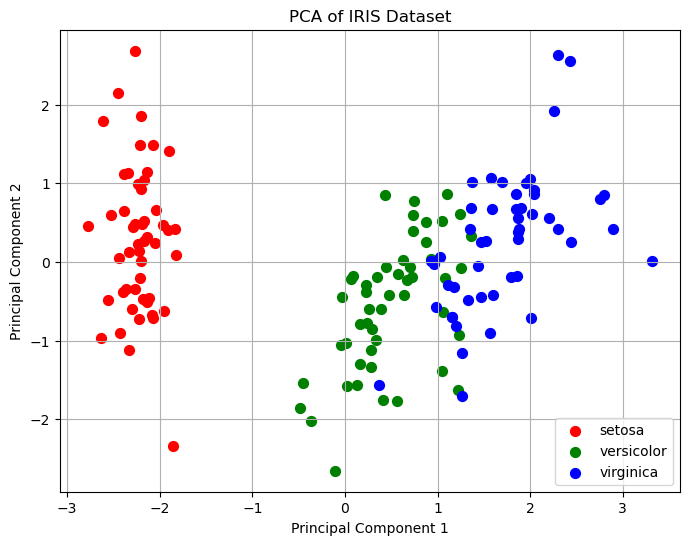

Explained variance ratio: [0.72962445 0.22850762]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#loading the iris dataset
iris=datasets.load_iris()
X=iris.data
y=iris.target
print("Shape of X(features):",X.shape)
print("Shape of y (target labels):", y.shape)
#displaying the first 5 sample
print("\nFirst 5 rows of X:\n",X[:5])
print("\nFirst % values of y:",y[:5])
#standardizing the data(import of pca)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print("Original means:",np.mean(X,axis=0))
print("Original standard deviations:", np.std(X,axis=0))
print("\nMeans after scaling:", np.std(X_scaled, axis=0))
#performing PCA, reducing the dataset to 2 principal components
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
#creating a dataframe with principal components
pca_df=pd.DataFrame(data=X_pca,columns=['Principal Component 1','Principal Component 2'])
pca_df['Target']=y
print(pca_df)
#visualizing the results
plt.figure(figsize=(8,6))
colors=['r','g','b']
targets=[0,1,2]
for target, color in zip(targets,colors):
    indices_to_keep=pca_df['Target']==target
    plt.scatter(pca_df.loc[indices_to_keep,'Principal Component 1'],
                pca_df.loc[indices_to_keep,'Principal Component 2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend(iris.target_names)
plt.grid()
plt.show()
#explained varience ratio to understand the varience captured by each component
print('Explained variance ratio:',pca.explained_variance_ratio_)

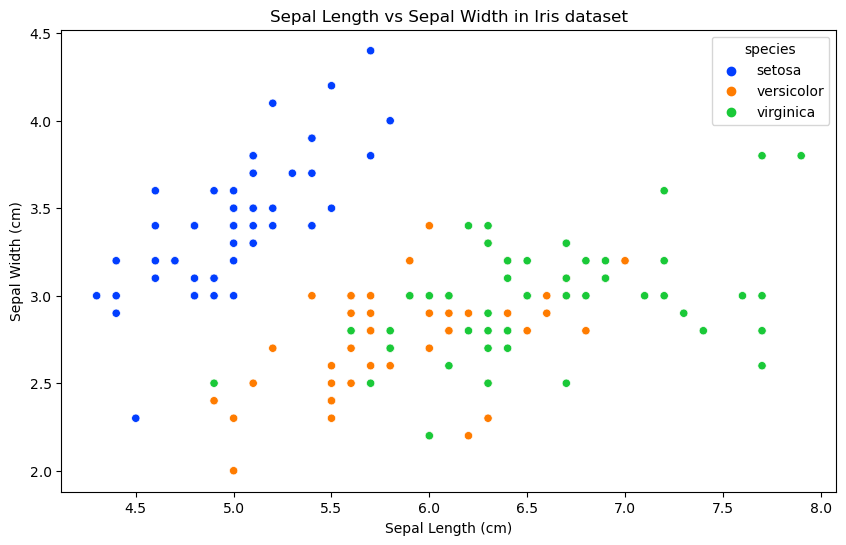

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#loading the iris dataset
iris_data=load_iris()
#converting to a pandas dataframe
iris_df=pd.DataFrame(data=iris_data['data'],columns=iris_data['feature_names'])
iris_df['species']=pd.Categorical.from_codes(iris_data['target'],iris_data['target_names'])
#creating the scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=iris_df['sepal length (cm)'],y=iris_df['sepal width (cm)'],hue=iris_df['species'],palette='bright')
#adding title and labels
plt.title('Sepal Length vs Sepal Width in Iris dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
#show the plot
plt.show()


LDA Tranformed Data(First 5 Rows):
   LDA Component 1  LDA Component 2  Target
0         8.061800         0.300421       0
1         7.128688        -0.786660       0
2         7.489828        -0.265384       0
3         6.813201        -0.670631       0
4         8.132309         0.514463       0


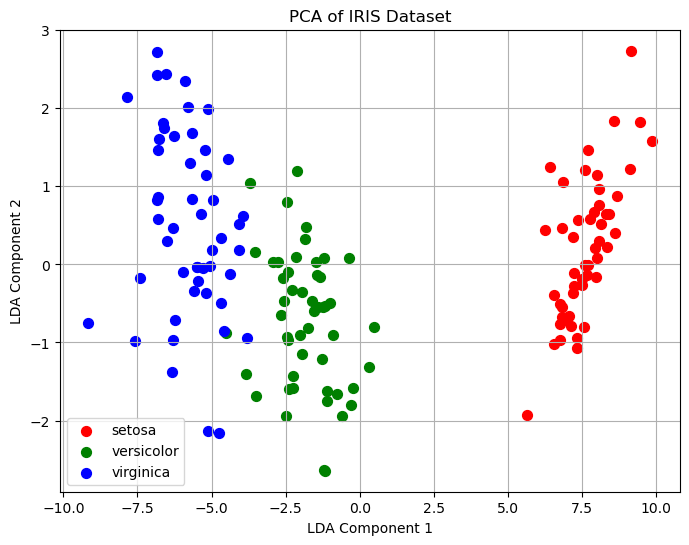

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#loading the iris dataset
iris=datasets.load_iris()
X=iris.data #features
y=iris.target #target labels
#convert to dataframe for clarity
df=pd.DataFrame(X, columns=iris.feature_names)
df['target']=y
#performing LCA, reducing the dataset to 2 principal components
lda=LDA(n_components=2)
X_lda=lda.fit_transform(X,y)
#creating a dataframe with principal components
lda_df=pd.DataFrame(data=X_lda,columns=['LDA Component 1','LDA Component 2'])
lda_df['Target']=y
print("LDA Tranformed Data(First 5 Rows):")
print(lda_df.head())
#define target variables and colors for the plot
colors=['r','g','b']
targets=[0,1,2]
#plot lda results
plt.figure(figsize=(8,6))
for target, color in zip(targets,colors):
    indices_to_keep=pca_df['Target']==target
    plt.scatter(lda_df.loc[indices_to_keep,'LDA Component 1'],
                lda_df.loc[indices_to_keep,'LDA Component 2'],
                c=color,
                s=50)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend(iris.target_names)
plt.grid()
plt.show()


t-SNE Transformed Data(First 5 Rows):
   TSNE Component 1  TSNE Component 2  Target
0         10.876560         -6.760251       0
1         10.867186         -5.953893       0
2         11.465132         -6.231559       0
3         11.402569         -6.024676       0
4         11.288991         -6.946169       0


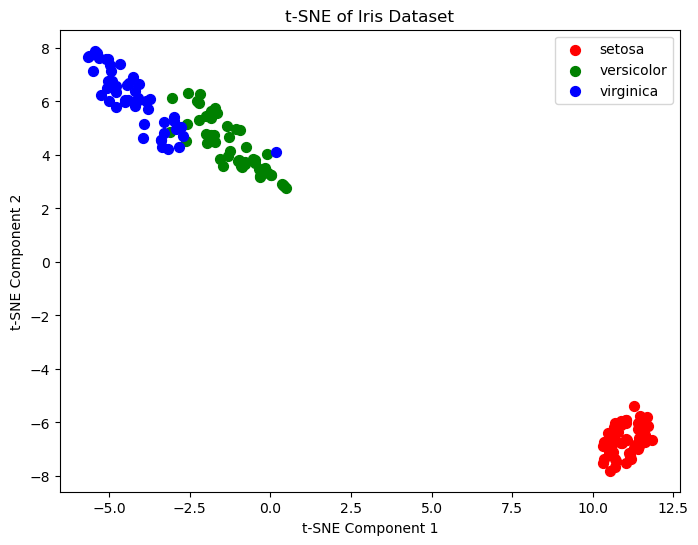

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
#loading iris dataset
iris=datasets.load_iris()
X=iris.data #features
y=iris.target #target labels
#
tsne=TSNE(n_components=2,perplexity=50,learning_rate=200,n_iter=1000)
#
X_tsne=tsne.fit_transform(X)
#convert to dataframe for better visualization
tsne_df=pd.DataFrame(X_tsne,columns=['TSNE Component 1','TSNE Component 2'])
tsne_df['Target']=y
print("t-SNE Transformed Data(First 5 Rows):")
print(tsne_df.head())
#define target labels and colors for the plot
targets=[0,1,2]
colors=['r','g','b']
#plot the t-SNE results
plt.figure(figsize=(8,6))
for target, color in zip(targets,colors):
    indices_to_keep=tsne_df['Target']==target
    plt.scatter(tsne_df.loc[indices_to_keep,'TSNE Component 1'],tsne_df.loc[indices_to_keep,'TSNE Component 2'],c=color,s=50,label=iris.target_names[target])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Iris Dataset')
plt.legend()


In [12]:
from scipy import stats
import numpy as np
#sales data
before_campaign=np.array([1000,950,1050,1100])
after_campaign=np.array([1100,1150,1200,1250])
#perform a paired t-test
t_stat,p_value=stats.ttest_rel(before_campaign,after_campaign)
print(f"T-statistic:{t_stat}")
print(f"p-value:{p_value}")
#hypothesis conclusion
if p_value<0.05:
    print("Reject the null hypothesis:The marketing campaign increased sales.")
else:
    print("Fail to reject th enull hypothesis: No significant increase in sales.")

T-statistic:-7.3484692283495345
p-value:0.005207858944662815
Reject the null hypothesis:The marketing campaign increased sales.


In [13]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 919.0 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.4 MB 1.4 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.4 MB 1.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 1.6 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 1.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 1.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.7/1.4 MB 1.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.7/1.4 MB 1.6 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 1.4 MB/s eta 0:00:01
   --------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
#
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
#
print("Dataset Head:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

#
def bin_data(column, bins, labels):
    return pd.cut(column,bins=bins, labels=labels, include_lowest=True)
bin_labels=[]